In [1]:
# importing libraries 

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
#Obtaining MTA data for the time period: August – November 2019

addr_list = (   ['http://web.mta.info/developers/data/nyct/turnstile/turnstile_190810.txt',
   'http://web.mta.info/developers/data/nyct/turnstile/turnstile_190817.txt',
    'http://web.mta.info/developers/data/nyct/turnstile/turnstile_190824.txt',
    'http://web.mta.info/developers/data/nyct/turnstile/turnstile_190831.txt',
    'http://web.mta.info/developers/data/nyct/turnstile/turnstile_190907.txt',
'http://web.mta.info/developers/data/nyct/turnstile/turnstile_190914.txt',
'http://web.mta.info/developers/data/nyct/turnstile/turnstile_190921.txt',
 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_190928.txt',
 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_191005.txt',
 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_191012.txt',
 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_191019.txt',
'http://web.mta.info/developers/data/nyct/turnstile/turnstile_191026.txt',
'http://web.mta.info/developers/data/nyct/turnstile/turnstile_191102.txt',
 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_191109.txt',
 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_191116.txt',
'http://web.mta.info/developers/data/nyct/turnstile/turnstile_191123.txt',
 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_191130.txt']   )  


mta_list = []
for addr in addr_list:
    mta_list.append(pd.read_csv(addr))
    
tot_weeks=len(mta_list)
mta = pd.concat(mta_list)

In [3]:
mta.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/03/2019,00:00:00,REGULAR,7156365,2421877
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/03/2019,04:00:00,REGULAR,7156388,2421884
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/03/2019,08:00:00,REGULAR,7156402,2421912
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/03/2019,12:00:00,REGULAR,7156499,2421993
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/03/2019,16:00:00,REGULAR,7156699,2422057


In [4]:
#changing column names
pd.set_option('display.max_rows', 50)
mta.columns = ['area', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time','desc', 'entries', 'exits']
mta.head(10)

,area,unit,scp,station,linename,division,date,time,desc,entries,exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/03/2019,00:00:00,REGULAR,7156365,2421877
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/03/2019,04:00:00,REGULAR,7156388,2421884
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/03/2019,08:00:00,REGULAR,7156402,2421912
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/03/2019,12:00:00,REGULAR,7156499,2421993
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/03/2019,16:00:00,REGULAR,7156699,2422057
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/03/2019,20:00:00,REGULAR,7156970,2422107
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/04/2019,00:00:00,REGULAR,7157129,2422125
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/04/2019,04:00:00,REGULAR,7157149,2422139
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/04/2019,08:00:00,REGULAR,7157160,2422156
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/04/2019,12:00:00,REGULAR,7157234,2422224


In [5]:
# 3.5 mln rows!!!
mta.shape

(3501614, 11)

In [6]:
mta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3501614 entries, 0 to 205543
Data columns (total 11 columns):
area        object
unit        object
scp         object
station     object
linename    object
division    object
date        object
time        object
desc        object
entries     int64
exits       int64
dtypes: int64(2), object(9)
memory usage: 320.6+ MB


In [7]:
#some of the stattions are combined
mta['station'].value_counts()

34 ST-PENN STA     72218
FULTON ST          68712
23 ST              52469
GRD CNTRL-42 ST    49714
86 ST              45454
                   ...  
GATES AV            2126
CHAUNCEY ST         2121
ORCHARD BEACH       1550
SUTTER AV           1435
CLEVELAND ST        1426
Name: station, Length: 378, dtype: int64

In [8]:
#creating datetime column
mta['dtime'] = pd.to_datetime(mta['date'] + ' ' + mta['time'])


In [9]:
#creating day of the week column
mta['day_of_week'] = mta['dtime'].dt.weekday_name

In [10]:
#creating month column
mta['month'] = mta['dtime'].dt.month
di = {8:'August', 9:'September', 10:'October', 11:'November'}
mta = mta.replace({'month':di})

In [11]:
mta.sort_values(['station','linename', 'area', 'unit', 'scp', 'dtime'], ascending = False , inplace = True)
mta

,area,unit,scp,station,linename,division,date,time,desc,entries,exits,dtime,day_of_week,month
180655,R419,R326,00-05-01,ZEREGA AV,6,IRT,11/29/2019,20:00:00,REGULAR,39,160,2019-11-29 20:00:00,Friday,November
180654,R419,R326,00-05-01,ZEREGA AV,6,IRT,11/29/2019,16:00:00,REGULAR,39,160,2019-11-29 16:00:00,Friday,November
180653,R419,R326,00-05-01,ZEREGA AV,6,IRT,11/29/2019,12:00:00,REGULAR,39,160,2019-11-29 12:00:00,Friday,November
180652,R419,R326,00-05-01,ZEREGA AV,6,IRT,11/29/2019,08:00:00,REGULAR,39,160,2019-11-29 08:00:00,Friday,November
180651,R419,R326,00-05-01,ZEREGA AV,6,IRT,11/29/2019,04:00:00,REGULAR,39,160,2019-11-29 04:00:00,Friday,November
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31787,H007,R248,00-00-00,1 AV,L,BMT,08/03/2019,16:00:00,REGULAR,14885151,16634901,2019-08-03 16:00:00,Saturday,August
31786,H007,R248,00-00-00,1 AV,L,BMT,08/03/2019,12:00:00,REGULAR,14885151,16634889,2019-08-03 12:00:00,Saturday,August
31785,H007,R248,00-00-00,1 AV,L,BMT,08/03/2019,08:00:00,REGULAR,14885151,16634879,2019-08-03 08:00:00,Saturday,August
31784,H007,R248,00-00-00,1 AV,L,BMT,08/03/2019,04:00:00,REGULAR,14885151,16634872,2019-08-03 04:00:00,Saturday,August


In [12]:
#getting one daily reading from turnstyles
#readings are cumulative 

mta_daily = (mta.groupby(["area", "unit", "scp", "station",  "date"],as_index=False)
                        [['entries','day_of_week', 'month','linename']].first())
mta_daily


,area,unit,scp,station,date,entries,day_of_week,month,linename
0,A002,R051,02-00-00,59 ST,08/03/2019,7156970,Saturday,August,NQR456W
1,A002,R051,02-00-00,59 ST,08/04/2019,7157557,Sunday,August,NQR456W
2,A002,R051,02-00-00,59 ST,08/05/2019,7158686,Monday,August,NQR456W
3,A002,R051,02-00-00,59 ST,08/06/2019,7159926,Tuesday,August,NQR456W
4,A002,R051,02-00-00,59 ST,08/07/2019,7161152,Wednesday,August,NQR456W
...,...,...,...,...,...,...,...,...,...
581576,TRAM2,R469,00-05-01,RIT-ROOSEVELT,11/25/2019,5554,Monday,November,R
581577,TRAM2,R469,00-05-01,RIT-ROOSEVELT,11/26/2019,5554,Tuesday,November,R
581578,TRAM2,R469,00-05-01,RIT-ROOSEVELT,11/27/2019,5554,Wednesday,November,R
581579,TRAM2,R469,00-05-01,RIT-ROOSEVELT,11/28/2019,5554,Thursday,November,R


In [13]:
#creating one more column with the reading from prev day from the same turnstyle
mta_daily[["prev_date", "prev_entries"]] = ( mta_daily.groupby(['area', "unit", "scp", "station"])['date','entries'].
                                            apply(lambda grp: grp.shift(1))  )



In [14]:
#removing Null values
mta_daily.dropna(subset=["prev_date"], axis=0, inplace=True)
mta_daily.head()

,area,unit,scp,station,date,entries,day_of_week,month,linename,prev_date,prev_entries
1,A002,R051,02-00-00,59 ST,08/04/2019,7157557,Sunday,August,NQR456W,08/03/2019,7156970.0
2,A002,R051,02-00-00,59 ST,08/05/2019,7158686,Monday,August,NQR456W,08/04/2019,7157557.0
3,A002,R051,02-00-00,59 ST,08/06/2019,7159926,Tuesday,August,NQR456W,08/05/2019,7158686.0
4,A002,R051,02-00-00,59 ST,08/07/2019,7161152,Wednesday,August,NQR456W,08/06/2019,7159926.0
5,A002,R051,02-00-00,59 ST,08/08/2019,7162333,Thursday,August,NQR456W,08/07/2019,7161152.0


In [15]:
def get_daily_counts(row, max_counter):
    counter = row["entries"] - row["prev_entries"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        #print(row["entries"], row["prev_entries"])
        counter = min(row["entries"], row["prev_entries"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 100000, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!


mta_daily["daily_entries"] = mta_daily.apply(get_daily_counts, axis=1, max_counter=100000)

In [16]:

mta_daily


,area,unit,scp,station,date,entries,day_of_week,month,linename,prev_date,prev_entries,daily_entries
1,A002,R051,02-00-00,59 ST,08/04/2019,7157557,Sunday,August,NQR456W,08/03/2019,7156970.0,587.0
2,A002,R051,02-00-00,59 ST,08/05/2019,7158686,Monday,August,NQR456W,08/04/2019,7157557.0,1129.0
3,A002,R051,02-00-00,59 ST,08/06/2019,7159926,Tuesday,August,NQR456W,08/05/2019,7158686.0,1240.0
4,A002,R051,02-00-00,59 ST,08/07/2019,7161152,Wednesday,August,NQR456W,08/06/2019,7159926.0,1226.0
5,A002,R051,02-00-00,59 ST,08/08/2019,7162333,Thursday,August,NQR456W,08/07/2019,7161152.0,1181.0
...,...,...,...,...,...,...,...,...,...,...,...,...
581576,TRAM2,R469,00-05-01,RIT-ROOSEVELT,11/25/2019,5554,Monday,November,R,11/24/2019,5554.0,0.0
581577,TRAM2,R469,00-05-01,RIT-ROOSEVELT,11/26/2019,5554,Tuesday,November,R,11/25/2019,5554.0,0.0
581578,TRAM2,R469,00-05-01,RIT-ROOSEVELT,11/27/2019,5554,Wednesday,November,R,11/26/2019,5554.0,0.0
581579,TRAM2,R469,00-05-01,RIT-ROOSEVELT,11/28/2019,5554,Thursday,November,R,11/27/2019,5554.0,0.0


In [17]:
mta_daily['daily_entries'].describe()

count    576623.000000
mean       1039.994185
std        1188.884944
min           0.000000
25%         262.000000
50%         786.000000
75%        1532.000000
max       99722.000000
Name: daily_entries, dtype: float64

In [18]:
# top ten by station
mta_top_volume =( mta_daily.groupby(['station','linename'])[['daily_entries']].sum().sort_values(by=['daily_entries'],
                        ascending=False).reset_index().head(10)  )

#weekly average by station
mta_top_volume['av_weekly'] = mta_top_volume.daily_entries/tot_weeks
mta_top_volume



,station,linename,daily_entries,av_weekly
0,GRD CNTRL-42 ST,4567S,14588623.0,858154.294118
1,34 ST-HERALD SQ,BDFMNQRW,12985992.0,763881.882353
2,42 ST-PORT AUTH,ACENQRS1237W,9390554.0,552385.529412
3,34 ST-PENN STA,ACE,8563710.0,503747.647059
4,14 ST-UNION SQ,LNQR456W,7148648.0,420508.705882
5,TIMES SQ-42 ST,1237ACENQRSW,6738494.0,396382.000000
6,59 ST COLUMBUS,ABCD1,6314718.0,371454.000000
7,47-50 STS ROCK,BDFM,6085218.0,357954.000000
8,FULTON ST,2345ACJZ,6020524.0,354148.470588
9,FLUSHING-MAIN,7,5868411.0,345200.647059


Text(0, 0.5, '')

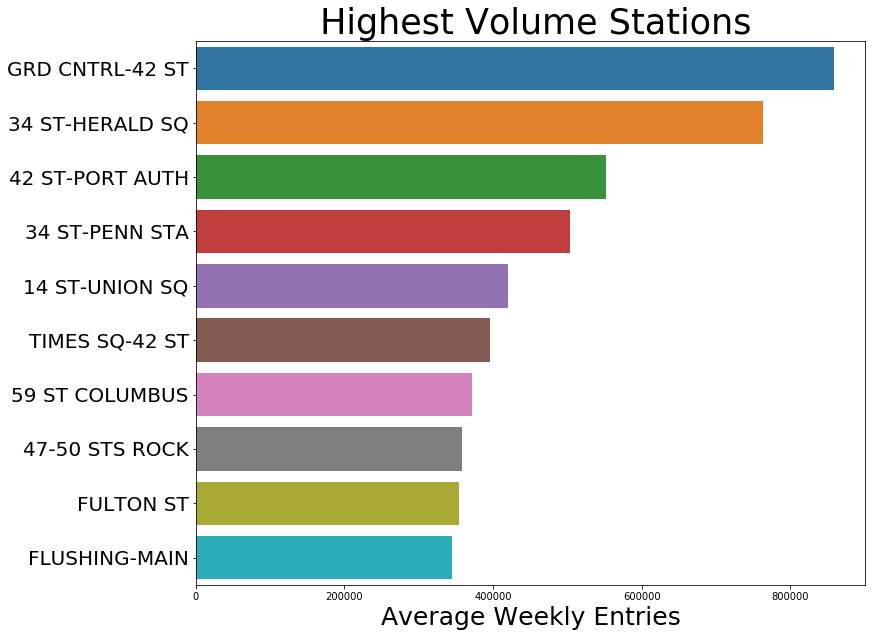

In [19]:
#plotting top 10 stations by volume

plt.figure(figsize=(12,10))
ax = sns.barplot(x='av_weekly', y = mta_top_volume.station, data = mta_top_volume)
plt.title(' Highest Volume Stations', fontsize=35)
plt.xlabel('Average Weekly Entries', fontsize=25)
plt.yticks(fontsize=20)
plt.ylabel('')

In [20]:
#creating a list of top stations
mask = mta_daily['station'].isin(mta_top_volume['station'])

In [21]:
#creating df with weekday traffic info for top 10 stations
mta_daily = mta_daily[mask]

mta_days = mta_daily.groupby('day_of_week')[['daily_entries']].mean().sort_values(by='daily_entries')
mta_days

,daily_entries
day_of_week,
Sunday,870.345792
Saturday,1064.799579
Monday,1700.772314
Friday,1827.848994
Thursday,1860.195580
Tuesday,1879.712377
Wednesday,1907.796976


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text yticklabel objects>)

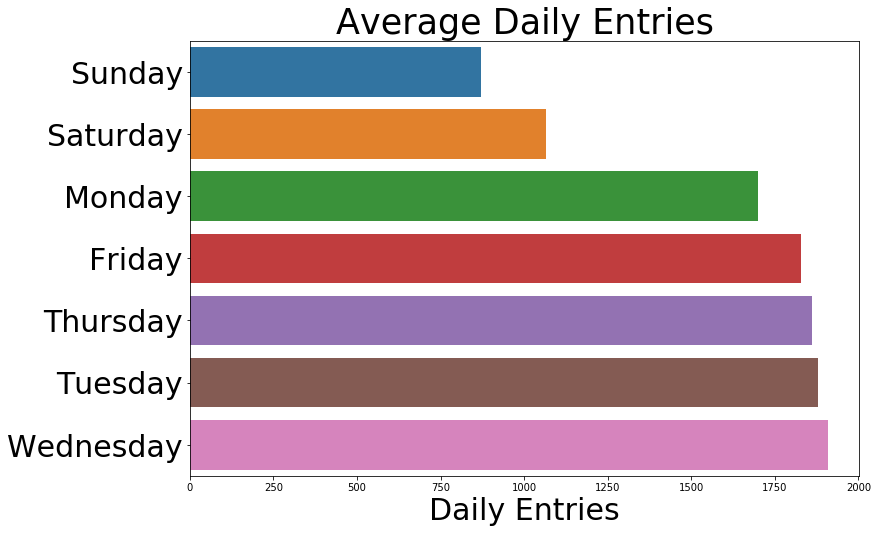

In [22]:
#plotting using seaborn
plt.figure(figsize=(12,8))
ax = sns.barplot(x='daily_entries', y = mta_days.index, data = mta_days)
plt.title('Average Daily Entries', fontsize=35)
plt.ylabel('')
plt.xlabel('Daily Entries', fontsize = 30)
plt.yticks(fontsize=30)


In [23]:
#aggreagating by month
mta_month = mta_daily.groupby('month')[['daily_entries']].mean().sort_values(by='daily_entries')
mta_month

,daily_entries
month,
August,1531.256414
November,1584.193815
September,1585.507412
October,1659.324698


(array([0, 1, 2, 3]), <a list of 4 Text yticklabel objects>)

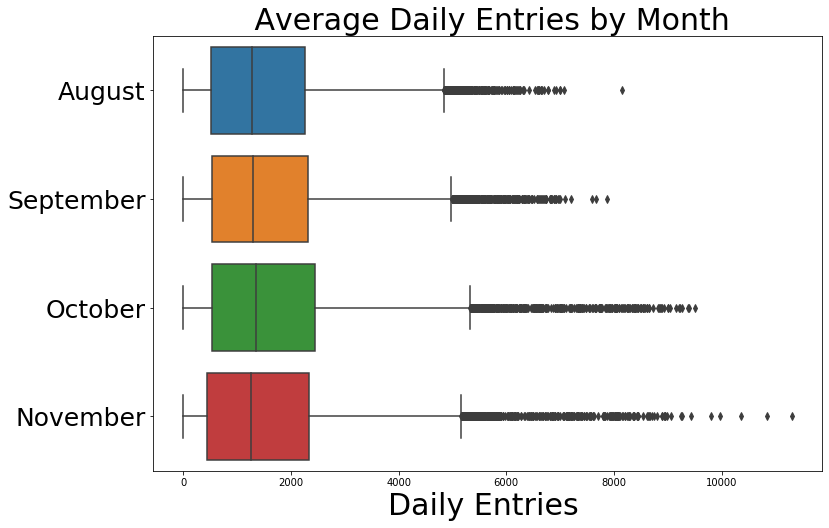

In [24]:
plt.figure(figsize=(12,8))
mta_daily_m = mta_daily[mta_daily['daily_entries']<12000]
sns.boxplot(x='daily_entries', data = mta_daily_m, y = 'month')
plt.title(' Average Daily Entries by Month', fontsize=30)
plt.xlabel('Daily Entries ', fontsize = 30)
plt.ylabel('')
plt.yticks(fontsize=25)

(array([0, 1, 2, 3]), <a list of 4 Text yticklabel objects>)

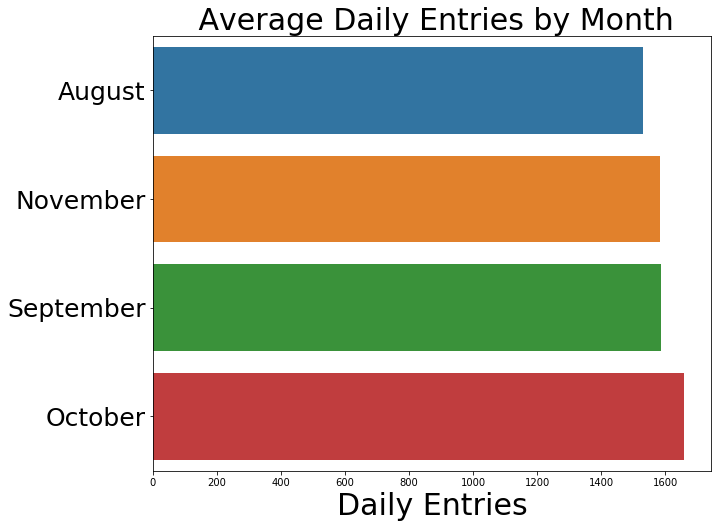

In [25]:

plt.figure(figsize=(10,8))
ax = sns.barplot(x='daily_entries', y = mta_month.index, data = mta_month)
plt.title(' Average Daily Entries by Month', fontsize=30)
plt.xlabel('Daily Entries', fontsize = 30)
plt.ylabel('')
plt.yticks(fontsize=25)